<a href="https://colab.research.google.com/github/mouravitor313/Projeto-em-Grupo-Modulo-4/blob/main/%5BM4%5D_Projeto_em_Grupo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dados para Abastecer o Carro
---
- SENAC/RESILIA - Formação em Análise de Dados (FAD)            
- Projeto em Grupo - Módulo 4                 
- !/usr/bin/env python3 - versão = '3.11(64-bit)' 
- (-*- coding:utf-8-*-)                                        
- Criado por: Douglas Klem Portugal do Amaral, Lenilson dos Reis Barros, Lorhan da Silva Costa e Vítor Hugo Almeida de Moura                   
- Data de criação: 07/05/2023                                  
---

#Contexto
___

Sua equipe foi escalada pela Agência Nacional de Petróleo e Gás Natural e Biocombustíveis (ANP) para realizar uma análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol. ANP é um centro de referência em dados e informações sobre a indústria de petróleo e gás natural que:

- Mantém o Banco de Dados de Exploração e Produção (BDEP);
- Promove estudos sobre o potencial petrolífero e o desenvolvimento do setor;
- Recebe e torna públicas as notificações de descobertas;
- Divulga as estatísticas oficiais sobre reservas, refino e produção de petróleo, gás e biocombustíveis no Brasil;
- Realiza e divulga rotineiramente pesquisas sobre qualidade dos combustíveis e lubrificantes e sobre o comportamento dos preços desses produtos;
- Consolida e divulga informações sobre os mercados regulados e acerca dos investimentos em pesquisa, inovação e formação profissional voltadas para os setores regulados.

#Limpeza dos Dados
---

**Selecionando e Importando os Dados:**
---

As fontes de dados que serão utilizadas no projeto estão
disponíveis no [portal gov.br](https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/serie-historica-de-precos-de-combustiveis).

Serão utilizados os arquivos dos dois últimos meses registrados: para o escopo e prazos desse projeto, serão março/2023 e abril/2023 (Etanol Hidratado +
Gasolina C) contendo a série histórica dos preços da
gasolina e do etanol em todo o Brasil.

In [ ]:
#realizando a importação das bibliotecas necessárias à execução do projeto (Pandas/NumPy/MatPlotLib)
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

**Célula temporária abaixo, apenas para a execução mais rápida do código.**

In [ ]:
database1 = pd.read_csv('/content/precos-gasolina-etanol-03.csv', sep=";")
database2 = pd.read_csv('/content/precos-gasolina-etanol-04.csv', sep=";")
#concatenando os dois csv
database3 = pd.concat([database1,database2])
display(database3)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,LOTEAMENTO PORTAL DA AMAZONIA,S/N,"QUADRA 101 LTS 01,02,03,04, 05 E 33",CALAFATE,69905-801,ETANOL,01/03/2023,"4,29",NaN,R$ / litro,VIBRA ENERGIA
1,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,LOTEAMENTO PORTAL DA AMAZONIA,S/N,"QUADRA 101 LTS 01,02,03,04, 05 E 33",CALAFATE,69905-801,GASOLINA ADITIVADA,01/03/2023,"5,39",NaN,R$ / litro,VIBRA ENERGIA
2,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,LOTEAMENTO PORTAL DA AMAZONIA,S/N,"QUADRA 101 LTS 01,02,03,04, 05 E 33",CALAFATE,69905-801,GASOLINA,01/03/2023,"5,39",NaN,R$ / litro,VIBRA ENERGIA
3,N,AC,RIO BRANCO,COMDEPE COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.198.443/0001-00,ESTRADA JARBAS PASSARINHO,115,NaN,PLACAS,69900-970,GASOLINA ADITIVADA,01/03/2023,"5,35",NaN,R$ / litro,VIBRA ENERGIA
4,N,AC,RIO BRANCO,COMDEPE COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.198.443/0001-00,ESTRADA JARBAS PASSARINHO,115,NaN,PLACAS,69900-970,GASOLINA,01/03/2023,"5,29",NaN,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46415,SE,RJ,DUQUE DE CAXIAS,POSTO ESTRELA GUIA DA TAQUARA LTDA,05.192.699/0002-33,AVENIDA AUTOMOVEL CLUBE,600,A,PARQUE A EQUITATIVA,25260-000,GASOLINA ADITIVADA,28/04/2023,"5,39",NaN,R$ / litro,BRANCA
46416,SE,RJ,DUQUE DE CAXIAS,POSTO ESTRELA GUIA DA TAQUARA LTDA,05.192.699/0002-33,AVENIDA AUTOMOVEL CLUBE,600,A,PARQUE A EQUITATIVA,25260-000,GASOLINA,28/04/2023,"5,39",NaN,R$ / litro,BRANCA
46417,CO,DF,BRASILIA,AUTO POSTO 303 NORTE LTDA,38.194.212/0001-20,QUADRA SHCN SQ 303 BLOCO A,SN PLL,NaN,ASA NORTE,70735-010,ETANOL,28/04/2023,"4,09",NaN,R$ / litro,VIBRA ENERGIA
46418,CO,DF,BRASILIA,AUTO POSTO 303 NORTE LTDA,38.194.212/0001-20,QUADRA SHCN SQ 303 BLOCO A,SN PLL,NaN,ASA NORTE,70735-010,GASOLINA ADITIVADA,28/04/2023,"5,89",NaN,R$ / litro,VIBRA ENERGIA


In [ ]:
#importação dos arquivos 'precos-gasolina-etanol-03.csv' e 'precos-gasolina-etanol-04.csv'
#correspondentes ao que está disponível no link citado acima
database1 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-03.csv', sep=";")
database2 = pd.read_csv('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2023/precos-gasolina-etanol-04.csv', sep=";")
#concatenando os dois dataframe
database3 = pd.concat([database1,database2])
display(database3)

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,LOTEAMENTO PORTAL DA AMAZONIA,S/N,"QUADRA 101 LTS 01,02,03,04, 05 E 33",CALAFATE,69905-801,ETANOL,01/03/2023,"4,29",NaN,R$ / litro,VIBRA ENERGIA
1,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,LOTEAMENTO PORTAL DA AMAZONIA,S/N,"QUADRA 101 LTS 01,02,03,04, 05 E 33",CALAFATE,69905-801,GASOLINA ADITIVADA,01/03/2023,"5,39",NaN,R$ / litro,VIBRA ENERGIA
2,N,AC,RIO BRANCO,CODEPE COMBUSTIVEIS LTDA,08.220.930/0001-62,LOTEAMENTO PORTAL DA AMAZONIA,S/N,"QUADRA 101 LTS 01,02,03,04, 05 E 33",CALAFATE,69905-801,GASOLINA,01/03/2023,"5,39",NaN,R$ / litro,VIBRA ENERGIA
3,N,AC,RIO BRANCO,COMDEPE COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.198.443/0001-00,ESTRADA JARBAS PASSARINHO,115,NaN,PLACAS,69900-970,GASOLINA ADITIVADA,01/03/2023,"5,35",NaN,R$ / litro,VIBRA ENERGIA
4,N,AC,RIO BRANCO,COMDEPE COMERCIO DE DERIVADOS DE PETROLEO LTDA,01.198.443/0001-00,ESTRADA JARBAS PASSARINHO,115,NaN,PLACAS,69900-970,GASOLINA,01/03/2023,"5,29",NaN,R$ / litro,VIBRA ENERGIA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46415,SE,RJ,DUQUE DE CAXIAS,POSTO ESTRELA GUIA DA TAQUARA LTDA,05.192.699/0002-33,AVENIDA AUTOMOVEL CLUBE,600,A,PARQUE A EQUITATIVA,25260-000,GASOLINA ADITIVADA,28/04/2023,"5,39",NaN,R$ / litro,BRANCA
46416,SE,RJ,DUQUE DE CAXIAS,POSTO ESTRELA GUIA DA TAQUARA LTDA,05.192.699/0002-33,AVENIDA AUTOMOVEL CLUBE,600,A,PARQUE A EQUITATIVA,25260-000,GASOLINA,28/04/2023,"5,39",NaN,R$ / litro,BRANCA
46417,CO,DF,BRASILIA,AUTO POSTO 303 NORTE LTDA,38.194.212/0001-20,QUADRA SHCN SQ 303 BLOCO A,SN PLL,NaN,ASA NORTE,70735-010,ETANOL,28/04/2023,"4,09",NaN,R$ / litro,VIBRA ENERGIA
46418,CO,DF,BRASILIA,AUTO POSTO 303 NORTE LTDA,38.194.212/0001-20,QUADRA SHCN SQ 303 BLOCO A,SN PLL,NaN,ASA NORTE,70735-010,GASOLINA ADITIVADA,28/04/2023,"5,89",NaN,R$ / litro,VIBRA ENERGIA


---

**Análise e Triagem dos Dados:**
---

Como as questões solicitadas são voltadas ao conhecimento de valores de venda e revenda, foi criada uma cópia do DataFrame utilizando apenas as seguintes informações: 

*Região, Estado, Municipio, Revenda, CNPJ da Revenda, Produto, Valor do Produto, Data da Coleta, Valor da Venda e Bandeira.*

Outras informações se demonstraram irrelevantes para atender as solicitações propostas.

In [ ]:
copia = database3[['Regiao - Sigla','Estado - Sigla','Municipio','Revenda','CNPJ da Revenda','Produto',
                   'Data da Coleta','Valor de Venda','Bandeira']].copy()

#Análise Exploratória
---

As perguntas a serem respondidas através dessa análise são:

*Insights* iniciais:

1. Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?
2. Qual o preço médio da gasolina e do etanol nesses dois meses?
3. Quais os 5 estados com o preço médio da gasolina e do etanol mais caros?
4. Qual o preço médio da gasolina e do etanol por estado?
5. Qual o município que possui o menor preço para a gasolina e para o etanol?
6. Qual o município que possui o maior preço para a gasolina e para o etanol?
7. Qual a região que possui o maior valor médio da gasolina?
8. Qual a região que possui o menor valor médio do etanol?
9. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido?
10. Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

*Insights* estratégicos:

11.   Há alguma correlação entre a oferta de combustíveis com a cidade e a quantidade de postos disponíveis? (ex: um morador do interior experimenta preços muito diferentes do morador da capital?) Quantidade de postos em cima de um região!!!
12.   Existem, de acordo com a quantidade de coleta de combustíveis em cidades/estados/regiões, pontos irregulares com a frequencia esperada pela fiscalização da cadeia do abastecimento de combustíveis realizada pela ANP?



## 1. *Insights* Iniciais

### [ 1 ] Comportamento do preço dos combustíveis durante março/2023 e abril/2023

In [ ]:
#Conversão dos dados da tabela "Valor de Venda" para float, permitindo as operações com números
copia['Valor de Venda']= copia['Valor de Venda'].str.replace(',', '.')
copia['Valor de Venda'] = copia['Valor de Venda'].astype(float)

In [ ]:
#Conversão da coluna "Data de Coleta" para o formato datetime para poder operar com os valores dos combustíveis
copia['Data da Coleta'] = pd.to_datetime(copia['Data da Coleta'], format='%d/%m/%Y')

In [ ]:
#Agrupamento dos preços a partir da data e dos tipos de combustíveis para calcular a média pelo comando .mean()
aggdias = copia.groupby([pd.Grouper(key='Data da Coleta',freq='D'),'Produto']).agg({'Valor de Venda': 'mean'})
display(aggdias)

Valor de Venda
Data da Coleta Produto                           
2023-03-01     ETANOL                    4.120540
               GASOLINA                  5.407843
               GASOLINA ADITIVADA        5.569754
2023-03-02     ETANOL                    4.204328
               GASOLINA                  5.576667
...                                           ...
2023-04-27     GASOLINA                  5.561083
               GASOLINA ADITIVADA        5.731089
2023-04-28     ETANOL                    4.293385
               GASOLINA                  5.578000
               GASOLINA ADITIVADA        5.701957

[129 rows x 1 columns]

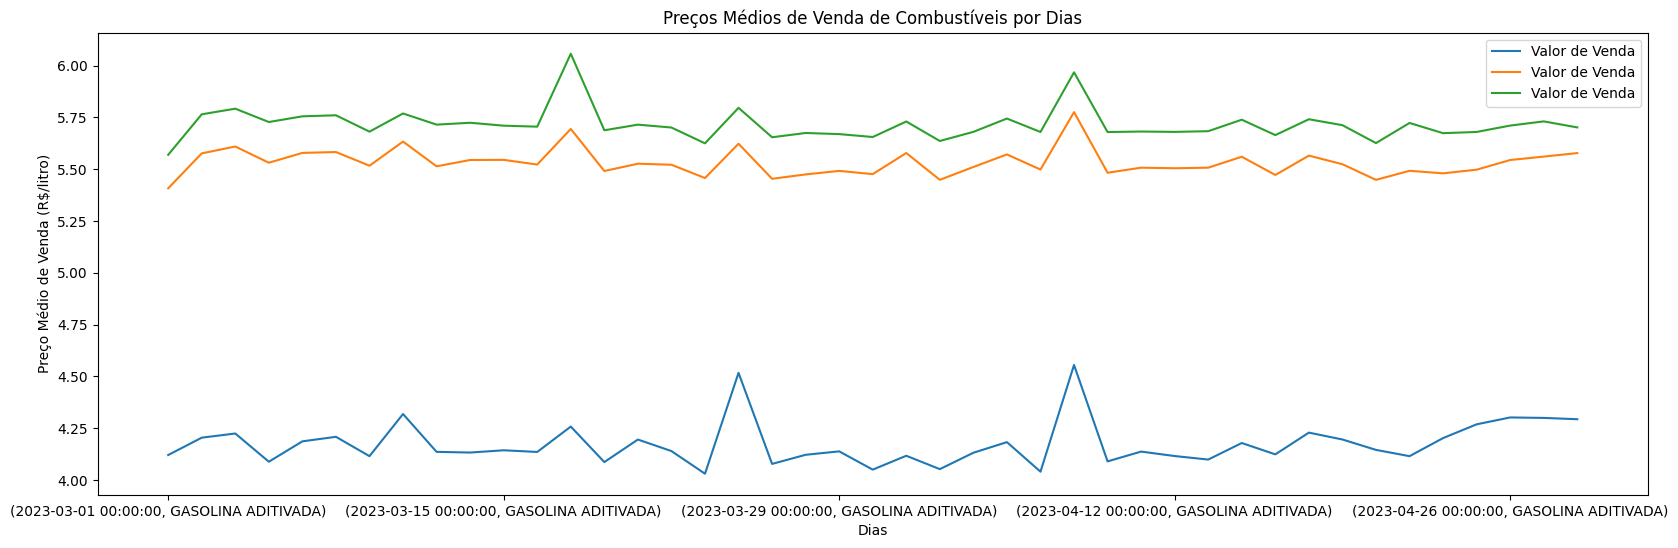

In [ ]:
#Gráfico de comportamento do preço dos combustiveis durante os meses analisados
fig, ax = plt.subplots(figsize=(20, 6))

for produto, data in aggdias.groupby('Produto'):
    data.plot(ax=ax,label=produto)

ax.set_title('Preços Médios de Venda de Combustíveis por Dias')
ax.set_xlabel('Dias')
ax.set_ylabel('Preço Médio de Venda (R$/litro)')
ax.legend() #gera a legenda do gráfico
plt.show() #plota o gráfico no terminal

### [ 2 ] Preço médio dos combustíveis durante março/2023 e abril/2023

In [ ]:
#Agrupamento dos dados por tipo de combustível pela função .groupby(), seguido de agregação via função .agg() em cima
#do preço desses combustíveis para extração da média via função .mean()
precomedio = copia.groupby('Produto').agg({'Valor de Venda': 'mean'})
display(precomedio)
#Gráfico de exibição em barras do preço médio da venda dos combustíveis]
#TERMINAR

,Valor de Venda
Produto,
ETANOL,4.147190
GASOLINA,5.510392
GASOLINA ADITIVADA,5.693321


### [ 3 ] Os 5 estados com o preço médio de combustíveis mais caros

In [ ]:
#Agrupamento dos dados pela sigla de cada estado e pelo tipo de combustível pela função .groupby(),
#seguido de agregação via função .agg() em cima do preço desses combustíveis para extração da média via função .mean()
mediaCombustiveis = copia.groupby(['Estado - Sigla', 'Produto']).agg({'Valor de Venda': 'mean'})
display(mediaCombustiveis)

Valor de Venda
Estado - Sigla Produto                           
AC             ETANOL                    4.433030
               GASOLINA                  5.926000
               GASOLINA ADITIVADA        5.973248
AL             ETANOL                    4.375649
               GASOLINA                  5.779836
...                                           ...
SP             GASOLINA                  5.339905
               GASOLINA ADITIVADA        5.586960
TO             ETANOL                    4.527049
               GASOLINA                  5.724865
               GASOLINA ADITIVADA        5.862028

[81 rows x 1 columns]

In [ ]:
#Filtro das informações da variável anterior via função .loc() para obter os dados selecionados e
#via funções .index.get_level_values para acessar os valores desses índices no nível hierárquico que queremos
#(no caso, o segundo nível: Produto)
mediaCombustiveis2 = mediaCombustiveis.loc[(mediaCombustiveis.index.get_level_values('Produto') == 'GASOLINA') |
                                         (mediaCombustiveis.index.get_level_values('Produto') == 'GASOLINA ADITIVADA') |
                                         (mediaCombustiveis.index.get_level_values('Produto') == 'ETANOL')]

In [ ]:
#Ordenação via função .sort_values() em ordem decrescente do preço médio dos combustíveis
mediaCombustiveis2 = mediaCombustiveis2.sort_values(['Produto', 'Valor de Venda'], ascending=[True, False])
display(mediaCombustiveis2)

,,Valor de Venda
Estado - Sigla,Produto,
AP,ETANOL,5.224000
RO,ETANOL,4.913316
RS,ETANOL,4.910343
RR,ETANOL,4.905556
PA,ETANOL,4.781585
...,...,...
PE,GASOLINA ADITIVADA,5.565403
MG,GASOLINA ADITIVADA,5.547102
SE,GASOLINA ADITIVADA,5.484038


In [ ]:
#Criação de variáveis para as 5 primeiras linhas de cada combustível via função .head()
rank5GAS = mediaCombustiveis2.loc[mediaCombustiveis2.index.get_level_values('Produto') == 'GASOLINA'].head(5)
rank5GASAD = mediaCombustiveis2.loc[mediaCombustiveis2.index.get_level_values('Produto') == 'GASOLINA ADITIVADA'].head(5)
rank5ET = mediaCombustiveis2.loc[mediaCombustiveis2.index.get_level_values('Produto') == 'ETANOL'].head(5)

In [ ]:
#Exibição dos resultados
display("Top 5 estados com o preço médio mais alto de GASOLINA:", rank5GAS)
print(' ')
display("Top 5 estados com o preço médio mais alto de GASOLINA ADITIVADA:", rank5GASAD)
print(' ')
display("Top 5 estados com o preço médio mais alto de ETANOL:", rank5ET)


'Top 5 estados com o preço médio mais alto de GASOLINA:'

,,Valor de Venda
Estado - Sigla,Produto,
AM,GASOLINA,6.489313
RR,GASOLINA,6.086423
RO,GASOLINA,5.993381
AC,GASOLINA,5.926000
RN,GASOLINA,5.872716


'Top 5 estados com o preço médio mais alto de GASOLINA ADITIVADA:'

,,Valor de Venda
Estado - Sigla,Produto,
AM,GASOLINA ADITIVADA,6.517795
RR,GASOLINA ADITIVADA,6.156094
RO,GASOLINA ADITIVADA,6.083455
CE,GASOLINA ADITIVADA,5.990847
AC,GASOLINA ADITIVADA,5.973248


'Top 5 estados com o preço médio mais alto de ETANOL:'

,,Valor de Venda
Estado - Sigla,Produto,
AP,ETANOL,5.224000
RO,ETANOL,4.913316
RS,ETANOL,4.910343
RR,ETANOL,4.905556
PA,ETANOL,4.781585


### [ 4 ] Preço médio dos combustíveis por estado

In [ ]:
#Agrupamento dos dados numa variável por sigla do estado e tipo de combustível pela função .groupby(),
#seguido de agregação via função .agg() em cima do preço desses combustíveis para extração da média via função .mean()
mediaCombustiveis3 = copia.groupby(['Estado - Sigla', 'Produto']).agg({'Valor de Venda': 'mean'})
mediaCombustiveis3

Valor de Venda
Estado - Sigla Produto                           
AC             ETANOL                    4.433030
               GASOLINA                  5.926000
               GASOLINA ADITIVADA        5.973248
AL             ETANOL                    4.375649
               GASOLINA                  5.779836
...                                           ...
SP             GASOLINA                  5.339905
               GASOLINA ADITIVADA        5.586960
TO             ETANOL                    4.527049
               GASOLINA                  5.724865
               GASOLINA ADITIVADA        5.862028

[81 rows x 1 columns]

### [ 5 ] Município que possui o menor preço para cada combustível

In [ ]:
#GASOLINA ADITIVADA
teste = copia.loc[copia['Produto'] == 'GASOLINA ADITIVADA', 'Valor de Venda'].idxmin() #check
minimo = copia.loc[teste, 'Municipio']
minimoE = copia.loc[teste, 'Estado - Sigla']
minimo, minimoE

(1431          ITU
 1431    SAO PAULO
 Name: Municipio, dtype: object,
 1431    SP
 1431    SP
 Name: Estado - Sigla, dtype: object)

In [ ]:
#GASOLINA 
teste2 = copia.loc[copia['Produto'] == 'GASOLINA', 'Valor de Venda'].idxmin() #check
minimo2 = copia.loc[teste2, 'Municipio']
minimo2E = copia.loc[teste2, 'Estado - Sigla']
minimo2, minimo2E

(918          SAO PAULO
 918    MOGI DAS CRUZES
 Name: Municipio, dtype: object,
 918    SP
 918    SP
 Name: Estado - Sigla, dtype: object)

In [ ]:
#ETANOL
teste3 = copia.loc[copia['Produto'] == 'ETANOL', 'Valor de Venda'].idxmin() #check
minimo3 = copia.loc[teste3, 'Municipio']
minimo3E = copia.loc[teste3, 'Estado - Sigla']
minimo3, minimo3E

(1091    VARZEA GRANDE
 1091        SAO PAULO
 Name: Municipio, dtype: object,
 1091    MT
 1091    SP
 Name: Estado - Sigla, dtype: object)

### [ 6 ] Município que possui o maior preço para cada combustível

In [ ]:
#GASOLINA ADITIVADA
teste = copia.loc[copia['Produto'] == 'GASOLINA ADITIVADA', 'Valor de Venda'].idxmax() #check
maximo = copia.loc[teste, 'Municipio']
maximoE = copia.loc[teste, 'Estado - Sigla']
maximo, maximoE

(15586         ARIQUEMES
 15586    JARAGUA DO SUL
 Name: Municipio, dtype: object,
 15586    RO
 15586    SC
 Name: Estado - Sigla, dtype: object)

In [ ]:
#GASOLINA 
teste2 = copia.loc[copia['Produto'] == 'GASOLINA', 'Valor de Venda'].idxmax() #check
maximo2 = copia.loc[teste2, 'Municipio']
maximo2E = copia.loc[teste2, 'Estado - Sigla']
maximo2, maximo2E

(34529    ITAQUAQUECETUBA
 34529               TEFE
 Name: Municipio, dtype: object,
 34529    SP
 34529    AM
 Name: Estado - Sigla, dtype: object)

In [ ]:
#ETANOL
teste3 = copia.loc[copia['Produto'] == 'ETANOL', 'Valor de Venda'].idxmax() #check
maximo3 = copia.loc[teste3, 'Municipio']
maximo3E = copia.loc[teste3, 'Estado - Sigla']
maximo3, maximo3E

(4826     ATIBAIA
 4826    PAULINIA
 Name: Municipio, dtype: object,
 4826    SP
 4826    SP
 Name: Estado - Sigla, dtype: object)

### [ 7 ] Região que possui o maior valor médio da gasolina

In [ ]:
media_por_regiao_gasolina = copia.loc[copia['Produto'] == 'GASOLINA'].groupby('Regiao - Sigla')['Valor de Venda'].mean()
regiao_maior_media_gasolina = media_por_regiao_gasolina.idxmax()
regiao_maior_media_gasolina

'N'

### [ 8 ] Região que possui o menor valor médio do etanol

In [ ]:
media_por_regiao_etanol = copia.loc[copia['Produto'] == 'ETANOL'].groupby('Regiao - Sigla')['Valor de Venda'].mean()
regiao_menor_media_etanol = media_por_regiao_etanol.idxmin()
regiao_menor_media_etanol

'CO'

### [ 9 ] Correlação entre o valor dos combustíveis e as regiões onde eles são vendidos


In [ ]:
#correlação "Regiao - Sigla" / "Valor de Venda"
#3 gráficos: cada um focando em um combustível e plotando preço médio das 5 regiões
#opções de gráfico: matplotlib/base map - gráfico de linhas OU matplotlib/seaborn - gráfico de dispersão/calor

### [ 10 ] Correlação entre o valor dos combustíveis e as bandeiras que os vendem

In [ ]:
#correlação "Bandeira" / "Valor de Venda"
#3 gráficos: cada um focando em um combustível e plotando preço médio das 5 regiões
#opções de gráfico: matplotlib/base map - gráfico de linhas OU matplotlib/seaborn - gráfico de dispersão/calor

## 2. *Insights* Estratégicos


### [ 11 ] Correlação entre a oferta de combustíveis com a cidade e a quantidade de postos disponíveis


### [ 12 ] Existência, de acordo com a quantidade de coleta de combustíveis em cidades/estados/regiões, de pontos irregulares de acordo com a frequência esperada pela fiscalização da cadeia de abastecimento

#Considerações Finais
---